# Comparação Generalização - Statlog (German Credit Data) Data Set

[Dataset (OpenML)](https://www.openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfClasses=%3D_2&id=31)

**Referência:** Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

## Carregamento do dataset

In [1]:
from sklearn.datasets import fetch_openml

credit_dataset = fetch_openml(data_id=31)

## Metadados do dataset

In [2]:
credit_dataset.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
credit_dataset['DESCR']

'**Author**: Dr. Hans Hofmann  \n**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)) - 1994    \n**Please cite**: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html)\n\n**German Credit dataset**  \nThis dataset classifies people described by a set of attributes as good or bad credit risks.\n\nThis dataset comes with a cost matrix: \n``` \nGood  Bad (predicted)  \nGood   0    1   (actual)  \nBad    5    0  \n```\n\nIt is worse to class a customer as good when they are bad (5), than it is to class a customer as bad when they are good (1).  \n\n### Attribute description  \n\n1. Status of the existing checking account, in Deutsche Mark.  \n2. Duration in months  \n3. Credit history (credits taken, paid back duly, delays, critical accounts)  \n4. Purpose of the credit (car, television,...)  \n5. Credit amount  \n6. Status of savings account/bonds, in Deutsche Mark.  \n7. Present employment, in number of years.  \n8. Installment rate in percentage o

In [4]:
credit_dataset['data']

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [5]:
from pandas import DataFrame

dataframe: DataFrame = credit_dataset['data']
dataframe.dtypes

checking_status           category
duration                   float64
credit_history            category
purpose                   category
credit_amount              float64
savings_status            category
employment                category
installment_commitment     float64
personal_status           category
other_parties             category
residence_since            float64
property_magnitude        category
age                        float64
other_payment_plans       category
housing                   category
existing_credits           float64
job                       category
num_dependents             float64
own_telephone             category
foreign_worker            category
dtype: object

In [6]:
target = credit_dataset['target']
target

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['good', 'bad']

## Treinamento do modelo

### Particionamento do dataset e variáveis compartilhadas

In [7]:
from sklearn.model_selection import train_test_split

# Seleciona apenas features numéricas
features = dataframe.select_dtypes(include=['number'])

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

### Treinamento - Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=150)
logistic_model.fit(x_train, y_train)
logistic_y_predicted = logistic_model.predict(x_test)

### Treinamento - KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=50)
knn_model.fit(x_train, y_train)
knn_y_predicted = knn_model.predict(x_test)

## Visualização dos resultados

### Matriz de confusão

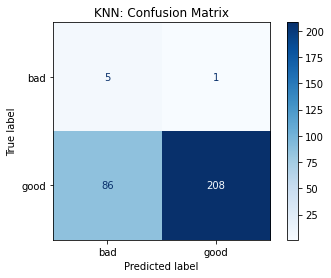

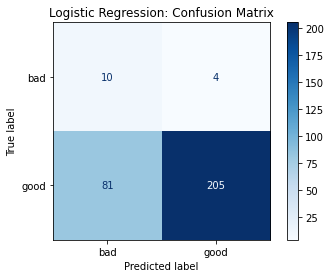

In [10]:
import matplotlib.pyplot as plot
from typing import Tuple, List
from sklearn.metrics import ConfusionMatrixDisplay

methods: List[Tuple[str, float]] = [
    ('KNN', knn_y_predicted),
    ('Logistic Regression', logistic_y_predicted)
]

for method_name, method_prediction in methods:
    matrix = ConfusionMatrixDisplay.from_predictions(method_prediction, y_test, cmap=plot.cm.Blues)
    matrix.ax_.set_title(f'{method_name}: Confusion Matrix')
    plot.xlabel('Predicted label')
    plot.ylabel('True label')
    plot.gcf().axes[0].tick_params()
    plot.gcf().axes[1].tick_params()
    plot.show()

### Métricas gerais (Acurácia, Interseção sobre União, Precisão, Sensibilidade)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, jaccard_score, recall_score, precision_score

# Encoder para converter a saída esperada de string ('bad', 'good') para números avaliáveis pelas métricas
label_encoder = LabelEncoder().fit(y_test)

y_test_int = label_encoder.transform(y_test)
knn_y_predict_int = label_encoder.transform(knn_y_predicted)
logistic_y_predict_int = label_encoder.transform(logistic_y_predicted)

knn_accuracy = accuracy_score(y_test_int, knn_y_predict_int)
knn_iou = jaccard_score(y_test_int, knn_y_predict_int)
knn_precision = precision_score(y_test_int, knn_y_predict_int)
knn_recall = recall_score(y_test_int, knn_y_predict_int)

logistic_accuracy = accuracy_score(y_test_int, logistic_y_predict_int)
logistic_iou = jaccard_score(y_test_int, logistic_y_predict_int)
logistic_precision = precision_score(y_test_int, logistic_y_predict_int)
logistic_recall = recall_score(y_test_int, logistic_y_predict_int)

data = {
    'Acurácia': [logistic_accuracy, knn_accuracy],
    'Jaccard Index (IoU)': [logistic_iou, knn_iou],
    'Precision': [logistic_precision, knn_precision],
    'Recall': [logistic_recall, knn_recall],
}

columns = ['Logistic Regression', 'KNN']
DataFrame.from_dict(data, orient='index', columns=columns)

,Logistic Regression,KNN
Acurácia,0.716667,0.710000
Jaccard Index (IoU),0.706897,0.705085
Precision,0.716783,0.707483
Recall,0.980861,0.995215


### Exibição de métricas

In [13]:
# from sklearn.metrics import accuracy_score
#
# accuracy = accuracy_score(y_test, logistic_y_predicted)
# print('Accuracy:', accuracy)
#
# intercept_value = logistic_model.intercept_
# print('Intercept:', intercept_value)
#
# coefficient = logistic_model.coef_
# print('Coeficientes:', coefficient)

## Plot MSE em relação à variação do atributo 'intercept'

In [14]:
# from typing import Tuple, List
#
#
# def calc_error(delta=100) -> Tuple[List[float], List[float]]:
#     _model = LogisticRegression()
#     _model.fit(x_train, y_train)
#
#     intercept = _model.intercept_
#     intercept_values = numpy.linspace(intercept - delta, intercept + delta, max(delta, 1000))
#     mse_array = []
#
#     for value in intercept_values:
#         logistic_model.intercept_ = value
#         y_predicted = logistic_model.predict(x_test)
#         _score = accuracy_score(y_test, y_predicted)
#         mse_array.append(_score)
#
#     return mse_array, intercept_values

In [15]:
# from matplotlib import pyplot
# import numpy
#
# pyplot.ylabel("Accuracy")
# pyplot.xlabel("Intercept")
#
# errors, weights = calc_error(3)
# pyplot.plot(weights, errors)